# PROJECT 1: BLOG POST

Question1 : What are the main factors of the decision of saving for retirement?

Question2 : Is the decision biased due to the law that obliged the worker to save?

Question3 : What are the recommendations for public sector?

Data source : “Encuesta Nacional de Demanda de Servicios Financieros y Nivel de Cultura
Financiera en el Perú” provided by Superintendencia de Banca y Seguros (SBS)

Econometric model : Logit Regression

## Import Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [70]:
df = pd.read_stata('Base de datos.dta', convert_categoricals=False)

## Cleaning of variables

- Save: (Dichotomic variable) Cases are the ones who answered in the question “p55” the options
from 1 to 6; Control, 7 and 8. In other words, Cases are the people who are saving money when they
get old (or retired), while Controls are not saving money.
- Age: (Numeric variable) Question “p3”.
- levelEducation: (Ordered variable) Question “p8”. Level of education reached
- maritalStatus: (Categorical variable) Question “p4”.
- Sex: (Dichotomic variable) Question “p2”. Men were assigned “0” and Women, “1”.
- Income: (Ordered variable) Question “p27”. It is divided in ranges
- NumMembersAtHome: (Numeric Variable). Question “p5”. Number of people who live in the
household.

In [71]:
#save variable
df['save'] = pd.Series(np.nan, index = df.index)
df['save'] = np.where((df['p55_1']== 1) | (df['p55_2']== 1) | (df['p55_3']== 1) | (df['p55_4']== 1) | (df['p55_5']== 1) | (df['p55_6']== 1), 1, df['save'])
df['save'] = np.where((df['p55_7']== 1) | (df['p55_8']== 1), 0, df['save'])
df.dropna(subset=['save'], axis = 0, how = 'any', inplace = True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6299 entries, 0 to 6304
Columns: 506 entries, sbs_id to save
dtypes: float32(4), float64(491), int16(1), int8(2), object(8)
memory usage: 24.1+ MB


In [73]:
#rename the columns
df.rename(columns = {'p3':'age', 'p8':'levelEducation', 'p4':'maritalStatus', 'p2':'sex', 'p27':'income', 'p5':'numMembersAtHome'}, inplace = True)

#subset the data
df = df[['save', 'age', 'levelEducation', 'maritalStatus', 'sex', 'income', 'numMembersAtHome']]

#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6299 entries, 0 to 6304
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   save              6299 non-null   float64
 1   age               6299 non-null   float64
 2   levelEducation    6299 non-null   float64
 3   maritalStatus     6282 non-null   float64
 4   sex               6299 non-null   float64
 5   income            4544 non-null   float64
 6   numMembersAtHome  6298 non-null   float64
dtypes: float64(7)
memory usage: 393.7 KB


In [74]:
#check na values
df.describe()

,save,age,levelEducation,maritalStatus,sex,income,numMembersAtHome
count,6299.000000,6299.000000,6299.000000,6282.000000,6299.000000,4544.000000,6298.000000
mean,0.420702,41.785839,5.760438,1.890003,0.583902,2.625660,4.255954
std,0.493711,14.554625,2.285494,0.545201,0.492949,1.554233,1.999659
min,0.000000,-8.000000,1.000000,1.000000,0.000000,-8.000000,-8.000000
25%,0.000000,30.000000,4.000000,2.000000,0.000000,1.000000,3.000000
50%,0.000000,41.000000,6.000000,2.000000,1.000000,2.000000,4.000000
75%,1.000000,53.000000,7.000000,2.000000,1.000000,4.000000,5.000000
max,1.000000,70.000000,11.000000,3.000000,1.000000,6.000000,20.000000


There exist answers '-8.0' in reference to Nan values. They have to be replaced

In [75]:
#replace '-8.0' with nan
for i in df:
    df[i] = np.where(df[i] == -8, np.nan, df[i])

In [76]:
#check the proportion of nan values in each variable
df.isnull().mean()

save                0.000000
age                 0.000635
levelEducation      0.000000
maritalStatus       0.002699
sex                 0.000000
income              0.279727
numMembersAtHome    0.001270
dtype: float64

Due to the fact that the proportion of nan values is relatively low, it will be better to drop nan values. The sample will be reduced in just 27% aprox. Another way to deal with nan values is to replac them with the mean or the mode (in case of categorical values).

In [77]:
#drop nan values
df.dropna(axis=0, how ='any', inplace=True)


In [78]:
df.describe()

,save,age,levelEducation,maritalStatus,sex,income,numMembersAtHome
count,4516.000000,4516.000000,4516.000000,4516.000000,4516.000000,4516.000000,4516.000000
mean,0.492471,42.749779,5.891497,1.901683,0.479628,2.642161,4.180027
std,0.499999,13.892446,2.317579,0.556119,0.499640,1.498891,1.961232
min,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,32.000000,4.000000,2.000000,0.000000,1.000000,3.000000
50%,0.000000,42.000000,6.000000,2.000000,0.000000,2.000000,4.000000
75%,1.000000,53.000000,8.000000,2.000000,1.000000,4.000000,5.000000
max,1.000000,70.000000,11.000000,3.000000,1.000000,6.000000,19.000000


In [79]:
#change the type of each variable
df = df.astype({'save':'uint8', 'age':'int64', 'levelEducation':'str', 'maritalStatus':'str', 'sex':'uint8', 'income':'str', 'numMembersAtHome':'int64'}, errors='ignore')

In [80]:
df

,save,age,levelEducation,maritalStatus,sex,income,numMembersAtHome
0,1,33,3.0,2.0,1,1.0,3
2,0,53,6.0,2.0,1,1.0,3
3,1,35,4.0,1.0,0,2.0,5
5,1,40,1.0,2.0,1,2.0,3
6,1,34,6.0,2.0,0,3.0,4
...,...,...,...,...,...,...,...
6300,1,34,10.0,2.0,1,4.0,2
6301,1,65,10.0,3.0,0,1.0,8
6302,1,30,10.0,2.0,1,6.0,4
6303,1,54,11.0,2.0,0,6.0,4


In [81]:
#Labeling the values of variables
df['save'] = df['save'].replace(['0.0', '1.0'], [0, 1])
df['levelEducation'] = df['levelEducation'].replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0'], \
                                          ['noEducation', 'kindergarten','incompletePrimary', 'completePrimary', 'incompleteSecondary',\
                                          'completeSecondary', 'incompleteTechnical', 'completeTechnical', 'incompleteUniversity',\
                                          'completeUniversity', 'Postgrade'])
df['maritalStatus'] = df['maritalStatus'].replace(['1.0', '2.0', '3.0'], ['single', 'married', 'divorced'])
df['sex'] = df['sex'].replace(['0.0', '1.0'], ['male', 'female'])
df['income'] = df['income'].replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0'], ['<400', '<400,750>', '<750,1022>', '<1022,1500>', '<1500,2100>', '>2100'])

## Graphical analysis

### Level of Education

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

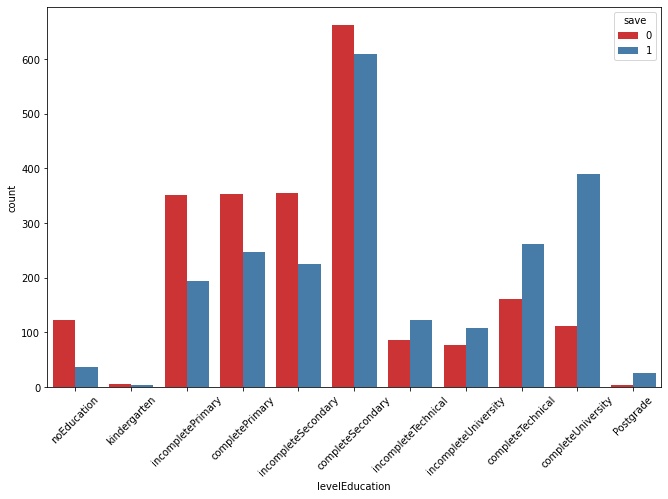

In [82]:
plt.figure(figsize=(11,7))
#Level of education
#transform it to categorical and give it order
df['levelEducation'] = pd.Categorical(df['levelEducation'], categories = ['noEducation', 'kindergarten','incompletePrimary', 'completePrimary', 'incompleteSecondary',\
                                          'completeSecondary', 'incompleteTechnical', 'incompleteUniversity','completeTechnical', \
                                          'completeUniversity', 'Postgrade'], ordered = True)
sns.countplot(x='levelEducation',hue='save',data=df,palette='Set1')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.tight_layout

Is higher the level of education reached, higher is the proportion of people who save for retirement

In [83]:
from scipy import stats

In [84]:
#chi square of independence
crosstab = pd.crosstab(df["save"], df["levelEducation"])
stats.chi2_contingency(crosstab)

(350.58339700360074,
 2.996286224606275e-69,
 10,
 array([[ 80.69707706,   4.56775908, 276.60318866, 305.02480071,
         294.87422498, 646.08414526, 106.07351639,  94.4003543 ,
         215.19220549, 254.27192205,  14.21080602],
        [ 78.30292294,   4.43224092, 268.39681134, 295.97519929,
         286.12577502, 626.91585474, 102.92648361,  91.5996457 ,
         208.80779451, 246.72807795,  13.78919398]]))

X2 test of independence give a pvalue<0.001, therefore it could be affirmed that there exist a relationship between this two variables

### Marital Status

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

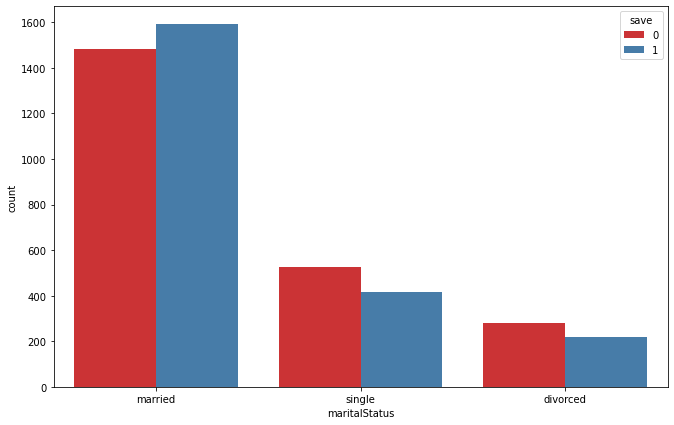

In [85]:
#Marital Status
plt.figure(figsize=(11,7))
sns.countplot(x='maritalStatus',hue='save',data=df,palette='Set1')
plt.tight_layout

Divorced and single people have a lower proportion of saving for retirement

In [86]:
#chi square of independence
crosstab = pd.crosstab(df["save"], df["maritalStatus"])
stats.chi2_contingency(crosstab)

(23.65933917031431,
 7.285171441087505e-06,
 2,
 array([[ 252.7493357 , 1561.15854739,  478.09211692],
        [ 245.2506643 , 1514.84145261,  463.90788308]]))

X2 test of independence give a pvalue<0.001, therefore it could be affirmed that there exist a relationship between this two variables

### Sex

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

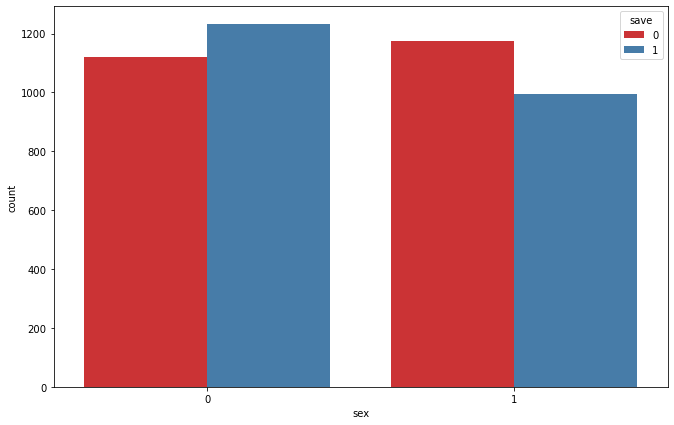

In [87]:
plt.figure(figsize=(11,7))
sns.countplot(x='sex',hue='save',data=df,palette='Set1')
plt.tight_layout

Males have a higher proportion of saving for retirement

In [88]:
#chi square of independence
crosstab = pd.crosstab(df["save"], df["sex"])
stats.chi2_contingency(crosstab)

(19.016080727857254,
 1.2962145808954675e-05,
 1,
 array([[1192.69264836, 1099.30735164],
        [1157.30735164, 1066.69264836]]))

X2 test of independence give a pvalue<0.001, therefore it could be affirmed that there exist a relationship between this two variables

### Income

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

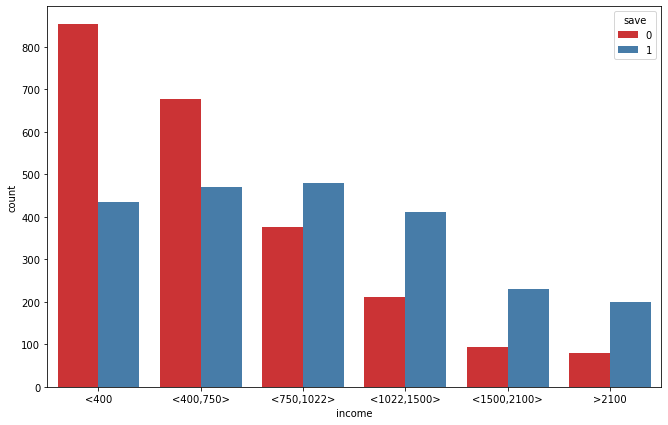

In [89]:
plt.figure(figsize=(11,7))
#Income
#transform it to categorical and give it order
df['income'] = pd.Categorical(df['income'], categories = ['<400', '<400,750>', '<750,1022>', '<1022,1500>', '<1500,2100>', '>2100'] , ordered = True)
sns.countplot(x='income',hue='save',data=df,palette='Set1')
plt.tight_layout

Clearly, people who earn more than 750 soles per month have a higher proportion of saving for retirement

In [90]:
#chi square of independence
crosstab = pd.crosstab(df["save"], df["income"])
stats.chi2_contingency(crosstab)

(358.21990255086877,
 2.973116188738553e-75,
 5,
 array([[653.18954827, 582.64304694, 434.44464128, 316.19043401,
         163.93179805, 141.60053144],
        [633.81045173, 565.35695306, 421.55535872, 306.80956599,
         159.06820195, 137.39946856]]))

X2 test of independence give a pvalue<0.001, therefore it could be affirmed that there exist a relationship between this two variables

### Age

<AxesSubplot:xlabel='save', ylabel='age'>

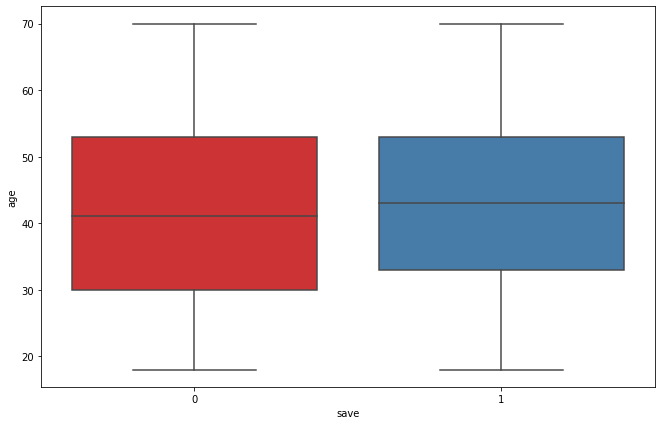

In [91]:
plt.figure(figsize=(11,7))
sns.boxplot(x='save', y = 'age', data = df, palette = 'Set1')

The medians of both groups, people who and not save, are very close; though the group of people who save has a higher median of age.

### Number of members at home

<AxesSubplot:xlabel='save', ylabel='numMembersAtHome'>

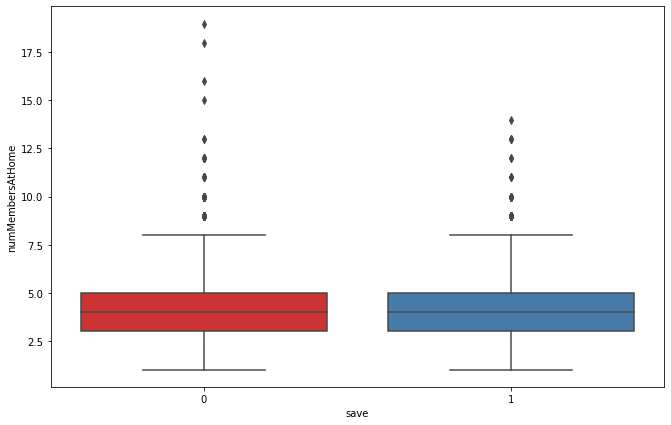

In [92]:
plt.figure(figsize=(11,7))
sns.boxplot(x='save', y = 'numMembersAtHome', data = df, palette = 'Set1')

The distributions of both groups are very similar. Also, there are several outliers.

## Logistic Regression

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
#convert the categorical variables to dummies:
catvars= df[df.columns].select_dtypes(include = ['object', 'category'])

In [95]:
for i in catvars.columns:
    df = pd.concat([pd.get_dummies(df[i], drop_first=True), df.drop([i], axis = 1)], axis=1)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4516 entries, 0 to 6304
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   <400,750>             4516 non-null   uint8
 1   <750,1022>            4516 non-null   uint8
 2   <1022,1500>           4516 non-null   uint8
 3   <1500,2100>           4516 non-null   uint8
 4   >2100                 4516 non-null   uint8
 5   married               4516 non-null   uint8
 6   single                4516 non-null   uint8
 7   kindergarten          4516 non-null   uint8
 8   incompletePrimary     4516 non-null   uint8
 9   completePrimary       4516 non-null   uint8
 10  incompleteSecondary   4516 non-null   uint8
 11  completeSecondary     4516 non-null   uint8
 12  incompleteTechnical   4516 non-null   uint8
 13  incompleteUniversity  4516 non-null   uint8
 14  completeTechnical     4516 non-null   uint8
 15  completeUniversity    4516 non-null   uint8
 16  Postgr

In [97]:
df.columns

Index(['<400,750>', '<750,1022>', '<1022,1500>', '<1500,2100>', '>2100',
       'married', 'single', 'kindergarten', 'incompletePrimary',
       'completePrimary', 'incompleteSecondary', 'completeSecondary',
       'incompleteTechnical', 'incompleteUniversity', 'completeTechnical',
       'completeUniversity', 'Postgrade', 'save', 'age', 'sex',
       'numMembersAtHome'],
      dtype='object')

In [99]:
#split the data
X = df[['<400,750>', '<750,1022>', '<1022,1500>', '<1500,2100>', '>2100',
       'sex', 'married', 'single', 'kindergarten', 'incompletePrimary',
       'completePrimary', 'incompleteSecondary', 'completeSecondary',
       'incompleteTechnical', 'incompleteUniversity', 'completeTechnical',
       'completeUniversity', 'Postgrade', 'age', 'numMembersAtHome']]
y = df['save']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [101]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [102]:
predictions = logmodel.predict(X_test)

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       741
           1       0.67      0.58      0.62       750

    accuracy                           0.65      1491
   macro avg       0.65      0.65      0.64      1491
weighted avg       0.65      0.65      0.64      1491



the model has a poor capacity for prediction

In [108]:
import statsmodels.api as sm
from scipy import stats

In [110]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 53.458013
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   save   No. Observations:                 3025
Model:                          Logit   Df Residuals:                     3005
Method:                           MLE   Df Model:                           19
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                     inf
Time:                        14:17:57   Log-Likelihood:            -1.6171e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
<400,750>                0.0726      0.107      0.679      0.497      -0.137       0.28

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [105]:
logmodel.coef_.sort()
coeff = pd.DataFrame(np.reshape(logmodel.coef_, (20,1)),  np.array(X.columns))
coeff.columns = ['Coefficient']

In [106]:
coeff['exp'] = np.exp(coeff['Coefficient'])

In [107]:
coeff

,Coefficient,exp
"<400,750>",-0.177560,0.837311
"<750,1022>",-0.159435,0.852625
"<1022,1500>",-0.074752,0.927973
"<1500,2100>",-0.009781,0.990267
>2100,0.011860,1.011930
sex,0.135859,1.145521
married,0.226481,1.254179
single,0.465441,1.592716
kindergarten,0.490469,1.633081
incompletePrimary,0.499775,1.648350
